In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
crime=pd.read_csv("crime_data.csv")

In [6]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [10]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return x

In [11]:
crime_norm=norm_func(crime.iloc[:,1:])

In [13]:
crime_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [14]:
crime_norm.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,0.420964,0.430685,0.568475,0.360000
std,0.262380,0.285403,0.245335,0.242025
min,0.000000,0.000000,0.000000,0.000000
25%,0.197289,0.219178,0.381356,0.200904
50%,0.388554,0.390411,0.576271,0.330749
75%,0.629518,0.698630,0.775424,0.487726
max,1.000000,1.000000,1.000000,1.000000


In [15]:
# create dendrogram

In [17]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch  ## For creating the dendrogram
from sklearn.cluster import AgglomerativeClustering


In [18]:
crime_norm.shape

(50, 4)

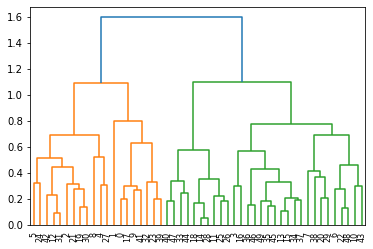

In [21]:
dendrogram=sch.dendrogram(sch.linkage(crime_norm,method="complete"))

In [59]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='single')

In [60]:
hc

AgglomerativeClustering(linkage='single', n_clusters=3)

In [61]:
y_hc=hc.fit_predict(crime_norm)

In [62]:
y_hc

array([0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [66]:
cluster_labels = pd.Series(hc.labels_)



In [67]:
crime_norm['clusters'] = cluster_labels 

In [2]:
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

NameError: name 'pd' is not defined

In [43]:
Clusters

,Clusters
0,0
1,1
2,0
3,0
4,0
5,0
6,0
7,0
8,2
9,0


In [69]:
crime_norm

,Murder,Assault,UrbanPop,Rape,clusters
0,0.746988,0.654110,0.440678,0.359173,0
1,0.554217,0.746575,0.271186,0.961240,1
2,0.439759,0.852740,0.813559,0.612403,0
3,0.481928,0.496575,0.305085,0.315245,0
4,0.493976,0.791096,1.000000,0.860465,0
5,0.427711,0.544521,0.779661,0.811370,0
6,0.150602,0.222603,0.762712,0.098191,0
7,0.307229,0.660959,0.677966,0.219638,0
8,0.879518,0.993151,0.813559,0.635659,2
9,1.000000,0.568493,0.474576,0.478036,0


In [70]:
crime_norm.iloc[:,2:].groupby(crime_norm.clusters).mean()

,UrbanPop,Rape,clusters
clusters,,,
0,0.569562,0.341731,0
1,0.271186,0.961240,1
2,0.813559,0.635659,2
